# K-Means Clustering
### Cluster analysis is a technique used in data mining and machine learning to group similar objects into clusters. K-means clustering is a widely used method for cluster analysis where the aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.
* k represents the number of clusters
* The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

### Type of Clustering

<img src="Image/K-Means.JPG"  width="600" height="300">

### Hierarchical Clustering
Clusters have a tree like structure or a parent child relationship

<img src="Image/K-Means2.JPG"  width="200" height="300">

### Agglomerative 
"Bottom up" approach: Begin with each element as a separate cluster and merge them into successively larger clusters

<img src="Image/K-Means3.JPG"  width="200" height="300">

### Divisive
"Top down" approach: Begin with the whole set and proceed to divide it into successively smaller clusters

<img src="Image/K-Means4.JPG"  width="200" height="300">

### K-Means
Division of objects into clusters such that each object is in exactly one cluster, not several

<img src="Image/K-Means5.JPG"  width="200" height="300">

### Fuzzy C-Means
Division of objects into clusters such that each object can belong to multiple clusters

<img src="Image/K-Means6.JPG"  width="200" height="300">

### Application of K-Means Clustering
* Academic Performance
* Diagnostic Systems
* Search Engines
* Wireless Sensor Network's

### Distance Measure
Distance measure will determine the similarity between two elements and it will influence the shape of the clusters.

* Euclidean
  <img src="Image/K-Means7.JPG"  width="600" height="300">
  
* Squared Euclidean
    <img src="Image/K-Means8.JPG"  width="600" height="300">
    
* Manhattan
    <img src="Image/K-Means9.JPG"  width="600" height="300">
    
* Cosine
    <img src="Image/K-Means10.JPG"  width="600" height="300">

### How does K-Means Clustering work?
Flow diagram

 <img src="Image/K-Means11.JPG"  width="600" height="300">

 ### Step 1: How do we find the number of clusters?  
 The best way is by Elbow method:
 
 * Run K-Means clustering on the dataset where k =  1, 2, 3, ...
 * Calculate sum of squares (WSS): the sum of the squared distance between each member of the cluster and its centroid
 * Draw a curve between WSS and the number of clusters k
 * We see a very slow change in the value of WSS after k = 2, so we should take that elbow point value as the final number of clusters

<img src="Image/K-Means12.JPG"  width="600" height="300">

### Step 2 & 3: Measure the distance
* We randomly initialize two points called the cluster centroids
* Calculate the distance measure to find out which data point is closest to out centroids
* Based upon the distance from c1 and c2 centroids, the data points will group itself into clusters

<img src="Image/K-Means13.JPG"  width="600" height="300">

### Step 4 & 5: Reposition the centroids
* Compute the centroid of data points inside the blue cluster
* Reposition the centroid of the blue cluster to the new centroid
* Compute the centroid of data points inside the yellow cluster
* Reposition the centroid of the orange cluster to the new centroid
* Some points may need to change cluster
  
<img src="Image/K-Means14.JPG"  width="600" height="300">

### Step 6: Once the clusters become static, K-Means clustering algorithm is said to be converged

### Another Explanation

<img src="Image/K-Means15.JPG"  width="600" height="300">

### Demos 1
Problem Statement:

* Walmart wants to open a chain of stores across Florida and wants to find out optimal store locations to maximize revenue

Solution:

* Walmart already has a strong e-commerce presence
* Walmart can use its online customer data to analyze the customer locations along with the monthly sales

### Use Case 1 - Implementation - make_blobs (make up data)

### 1. Importing the libraries

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

### 2. Creating make up data

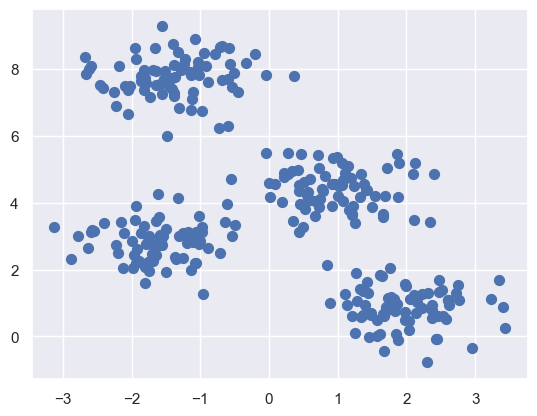

In [63]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

### 3. Elbow method to determine the optimum number of clusters

Text(0, 0.5, 'Inertia')

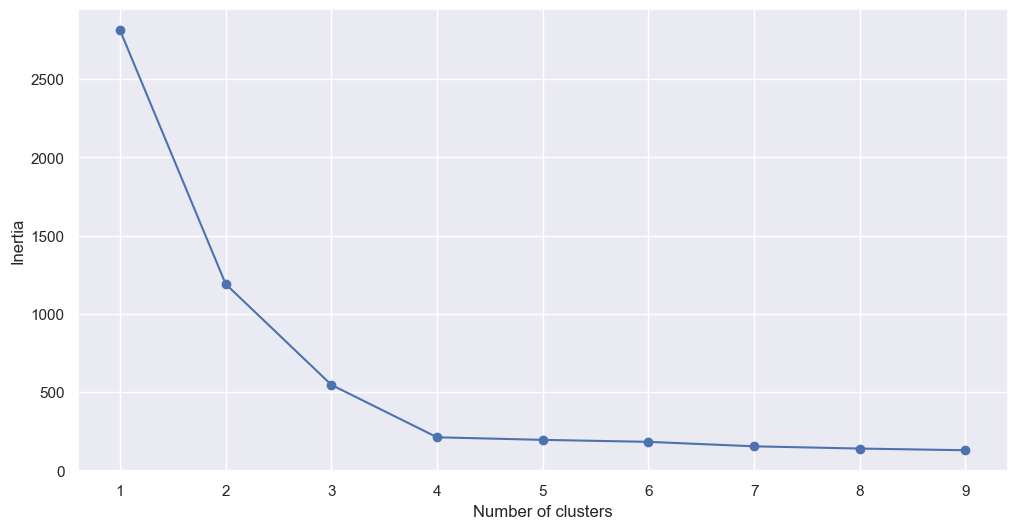

In [73]:
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore') # Fix version issue

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init='auto')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose number of clusters as 4

### 4. Fitting the training set

In [72]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [65]:
y_pred

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3])

### Use Case: K-Means for Color Compression
Problem Statement:
To perform color compression on images using K-Means algorithm

### 1. Importing the libraries

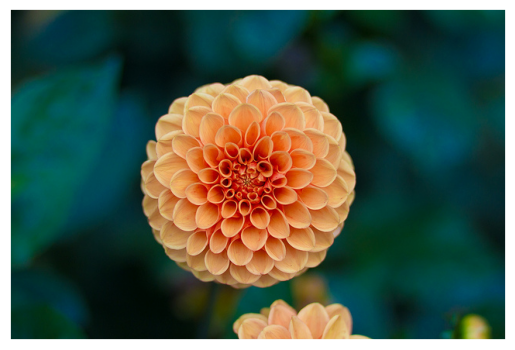

In [18]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [20]:
# returns the dimensions of the array
china.shape

(427, 640, 3)

In [24]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [25]:
#reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1
data = china / 255.0 # use 0...1 scale
data

array([[[0.00784314, 0.0745098 , 0.05098039],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.30196078, 0.25098039],
        [0.        , 0.29803922, 0.25098039],
        [0.        , 0.29411765, 0.24705882]],

       [[0.00392157, 0.07058824, 0.04705882],
        [0.01176471, 0.07058824, 0.05098039],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.        , 0.29803922, 0.25098039],
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.25490196]],

       [[0.00784314, 0.06666667, 0.04705882],
        [0.02352941, 0.0745098 , 0.04705882],
        [0.02745098, 0.07843137, 0.05098039],
        ...,
        [0.00392157, 0.29019608, 0.25490196],
        [0.00392157, 0.29019608, 0.2627451 ],
        [0.00392157, 0.29019608, 0.2627451 ]],

       ...,

       [[0.        , 0.18039216, 0.15686275],
        [0.00392157, 0.18823529, 0.15686275],
        [0.00392157, 0

In [28]:
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [49]:
# visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    #chose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T

    fig, ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color = colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))

    ax[1].scatter(R,B,color = colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))

    plt.title(title)

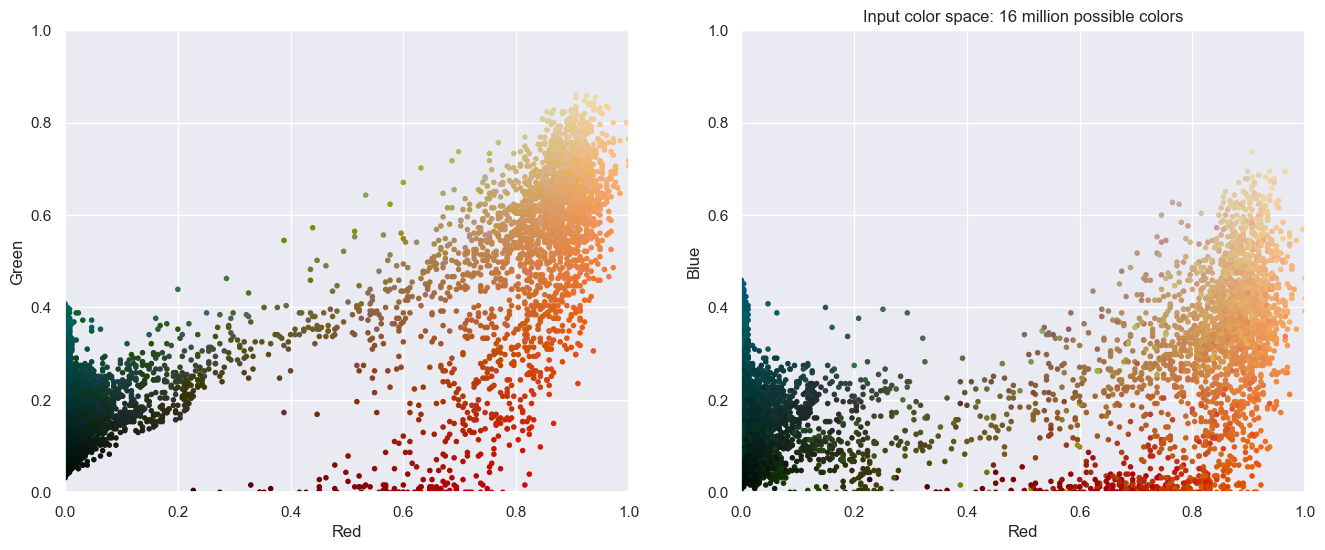

In [50]:
plot_pixels(data, title='Input color space: 16 million possible colors')

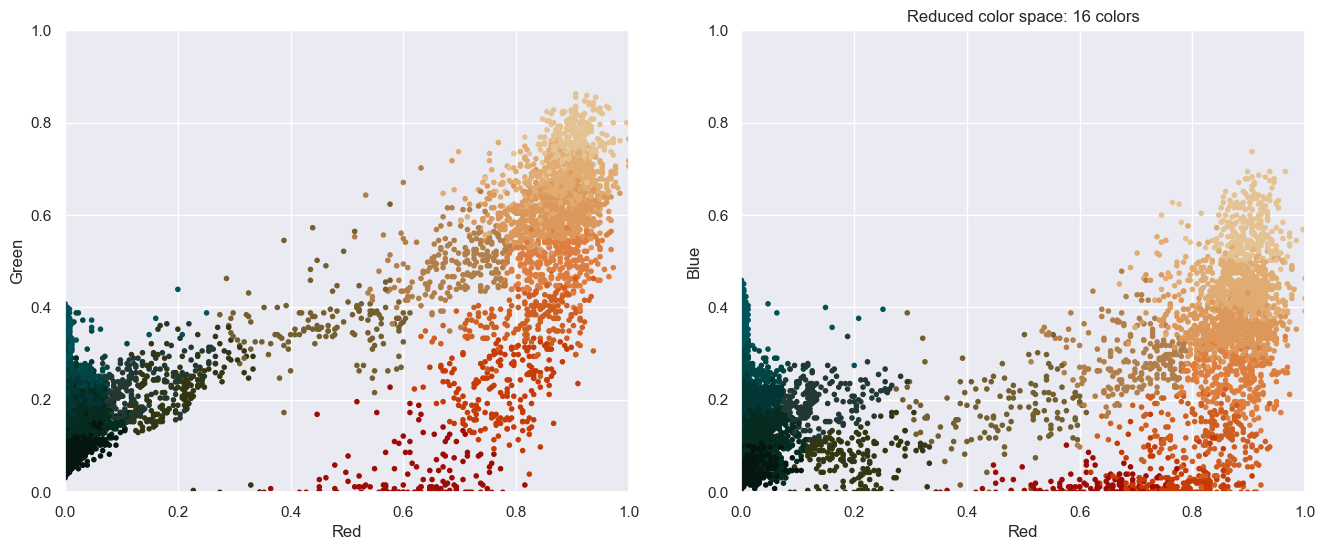

In [53]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16, n_init='auto')
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16-color Image')

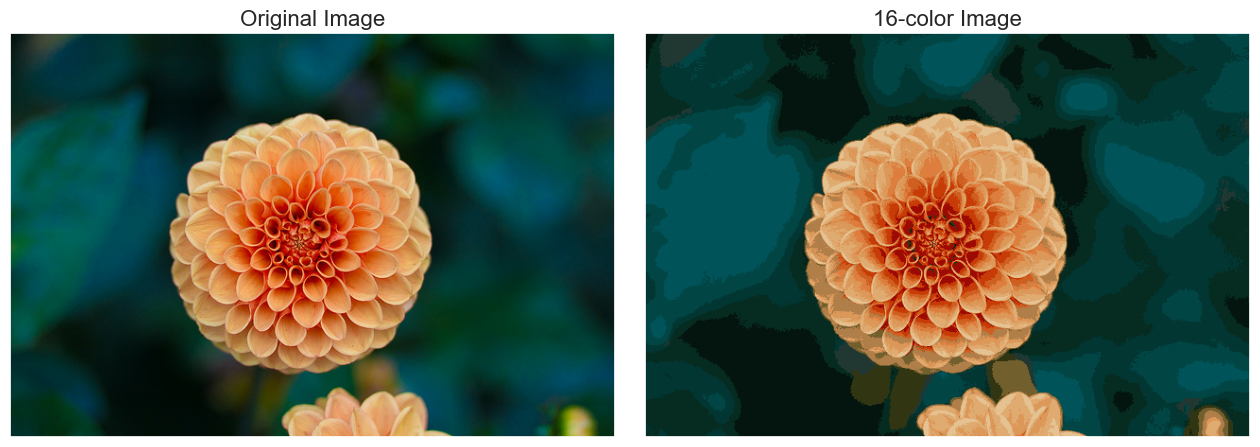

In [57]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1,2, figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

In [58]:
kmeans.inertia_

929.4106564828357